# 복습
- 시계열 데이터: 상관관계 존재, 시퀀스 데이터
- 단변량 시계열: 단일 변수로 이뤄짐
- 다변량 시계열: 둘 이상의 변수, 상호 작용 및 영향력 파악

### 시계열 데이터의 특징
1. 시간 의존성
2. 계절성, 추세: 장기적 증감 추세, 일정 주기 반복 패턴
3. 자기상관성: 과거가 현재와 미래에 영향을 미친다(회귀도 못 씀).
    - $Cov(\varepsilon_t, \varepsilon_{t+1}) ≠ 0$

### 분석 요인
1. 추세: 지속적으로 증감하는 경향
2. 순환: 더 길고 불규칙한 주기로 반복되는 변동
3. 계절: 일정한 주기 반복 패턴
4. 불규칙 요인: 예측 불가능한 변동

### 분석 프로세스
1. 데이터 전처리
2. 정상성 판단
    - 정상/비정상 시계열 여부 판단: 단위근 검정
    - 비정상 유형에 따라 정상성 확보: 추세 > 차분, 계절성 > 계절 차분, 분산 > 로그/Box-Cox
3. 모델링 및 예측

# 1. 단변량 시계열 분석
## 1.1 안정적 시계열 분석

### 1. 자기 회귀 모델(Autoregressive Model, AR)
- 자기 회귀: 과거가 미래 값을 설명해준다고 가정
    - 과거 데이터가 독립변수 $x$, 현재 $y$
    - 자기상관성 활용하기

$AR(p):  y_{t}=c +\phi _1y_{t-1}+\phi_2y_{t-2}+...+\phi _py_{t-p}+\varepsilon _t$
- p차 AR 모형
- 과거 p개 데이터를 선형 조합하여 예측하기
- $x$ 대신 ($y$)의 ($y_{t-n}$)
- MLE로 파라미터를 추정함

$AR(1):  y_{t}=c +\phi_1y_{t-1}+\varepsilon _t$
- 1: 1년/1달/1일/... 가능

<br></br>
- OLS 회귀
- $Y_{t+1}$ 예측: $\hat{Y}_{t+1} = \beta_0 + \beta_1 Y_t + \beta_2 Y_{t-1}$
- $Y_{t+2}$ 예측: $\hat{Y}_{t+2} = \beta_0 + \beta_1 \hat{Y}_{t+1} + \beta_2 Y_t$
    - 예측값을 또 예측에 사용 > 예측 부정확
    - OLS 회귀는 시계열 예측에 적합하지 않다

### 2. 이동 평균 모델(Moving Average , MA)
- 평활화 기법인 MA와는 전혀 다른 개념이다.
- 과거 충격이 현재에 영향을 준다고 가정한다.
- 과거 시점의 잔차를 독립변수로 현재 값을 예측함.
- 잔차($\varepsilon$): 백색잡음, 서로 독립적
    - 백색잡음: 평균 0, 분산 일정, 과거 영향 X, 외부 충격으로만 결정
- $MA(q): y_t = \mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}$
    - q차 이동 평균 모형
    - 과거 q개 예측 오차의 선형 결합

$$MA(1):  y_{t}=\mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}$$
- $y_t$은 $\varepsilon_{t-1}$의 영향을 받는다.
- $\theta_1$ 충격이 영향을 미치는 정도

### 3. AR, MA의 전제 조건

1. 정상성
- AR의 정상성 조건
    - 특성 방정식: $1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$
    - 모델의 정상성 확보(ADF, KPSS는 데이터의 정상성)
    - 모든 해의 절댓값이 1보다 커야 함.

- MA의 정상성 조건
    - 잔차는 정상성을 이미 만족 > MA도 항상 정상성 만족

2. 가역성
- MA 모형을 AR(∞) 형태로 다시 표현할 수 있는지
    - $\varepsilon$를 y로 표현하면 된다.
    - 오차항도 과거 관측값으로 표현할 수 있어야 한다: 안정적, 모델 유일성
- AR은 가역성을 체크할 필요 없다.
- MA의 가역성 조건
    - 특성 방정식: $1 + \theta_1 z + \cdots + \theta_q z^q = 0$
    - 모든 해의 절댓값이 1보다 커야 함.

### 4. ARMA(Autoregressive Moving Average) 모형
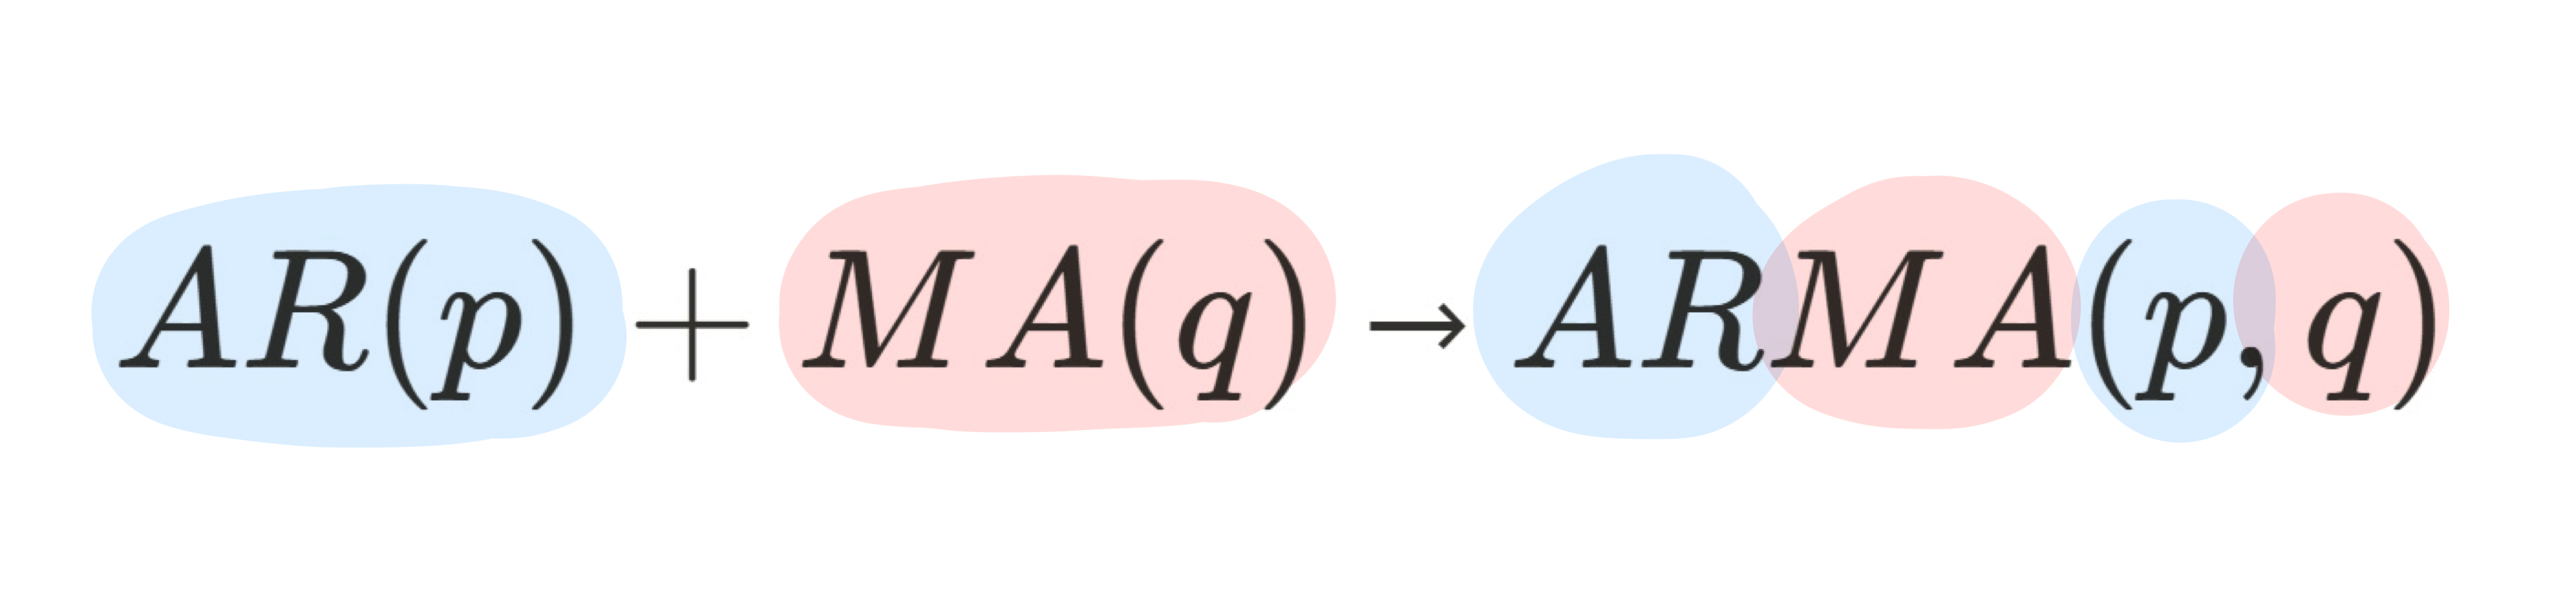
$$Y_t = \underbrace{\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p}}_{\text{AR(p): 자기회귀}} 
+ \underbrace{\varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}}_{\text{MA(q): 이동평균}}$$

- AR(p) + MA(q)
    - 과거 p개 관측 + 과거 q개 오차
    - AR의 정상성, MA의 가역성을 모두 만족해야 한다!!!

- ARMA의 특수 경우
    - ARMA(p, 0) == AR(p)
    - ARMA(0, q) == MA(q)
    - ARMA(0, 0) == 백색 잡음 모델

### 5. 차수 결정: 자기 상관 함수
- 자기 상관계수(Auto Correlation Function, ACF)
    - ARMA(p, q)에서 사용할 q개의 오차를 결정하는 방법
    - 두 시점 사이의 상관관계(+ 간접영향)를 파악
    - $ACF(k) = \text{Corr}(y_t, y_{t-k})$
        - 시차(lag) k에 대해 두 관측 간 상관관계를 나타냄
        - 직접적 영향뿐만 아니라 간접적 영향도 반영

- 부분 자기 상관계수(Partial Autocorrelation Function, PACF)
    - ARMA(p, q)에서 사용할 p개 시점 결정
    - 직접적 영향만 파악
    - 두 시점 사이 순수 상관관계: 다른 시점의 상호 의존성 제거

 $e_t = y_t - (\beta_1y_{t-1} + ... + \beta_{k-1}y_{t-(k-1)})$일 때,<br>
$$PACF(k) = Corr(e_t, e_{t-k})$$

### 6. ACF와 PACF로 차수, 모형 결정하기

- AR(p)? ACF: 천천히 (진동) 감소 / PACF: p+1부터 0에 근접
    - 과거 값이 계속 영향을 줌. 여러 과거 값과 약하게 연결
    - p까지의 과거가 현재에 영향 주고, 그 후로는 직접적 X
- MA(q)? ACF: q+1부터 0에 근접 / PACF: 천천히 (진동) 감소
    - q까지만 과거 오차항의 영향, q+1부터는 오차 영향 없음
    - 오차항들이 만들어내는 간접 상관이 멀리 떨어진 시점 간에도 존재
- ARMA(p, q)? ACF: q+1부터 0에 근접 / PACF: p+1부터 0에 근접

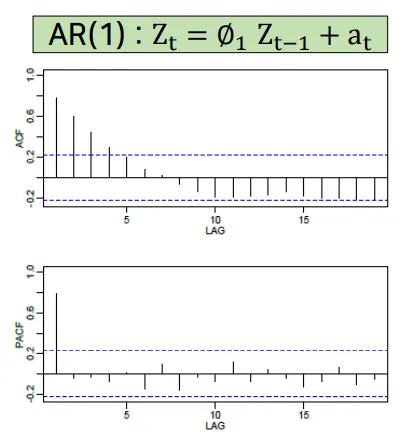
- ACF가 천천히 감소
- PACF는 1 이후 신뢰 구간 안에 들어와 있음
- 최종적으로 p=1, q=0 > ARMA(1, 0)

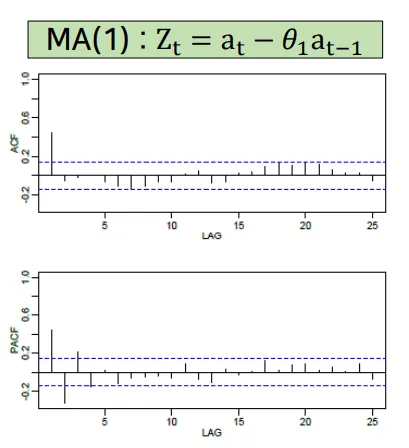
- ACF는 1 이후 신뢰 구간 안에 들어와 있음
- PACF는 천천히 진동 감소
- 최종적으로 p=0, q=1 > ARMA(0, 1)

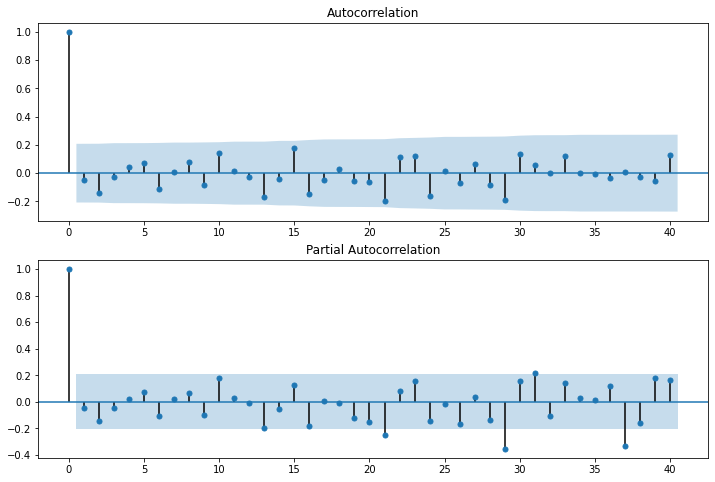
- ACF: 1 이후 신뢰 구간 안에 들어와 있음
- PACF: 1 이후 신뢰 구간 안에 들어와 있음
- 최종적으로 p=1, q=1 > ARMA(1, 1)

## 1.2 불안정 시계열
- 불안정 시계열 모델은 ARMA에 정상성 확보(차분, 계절성 차분) 추가

### 1. ARIMA (Autoregressive Integrated Moving Average)
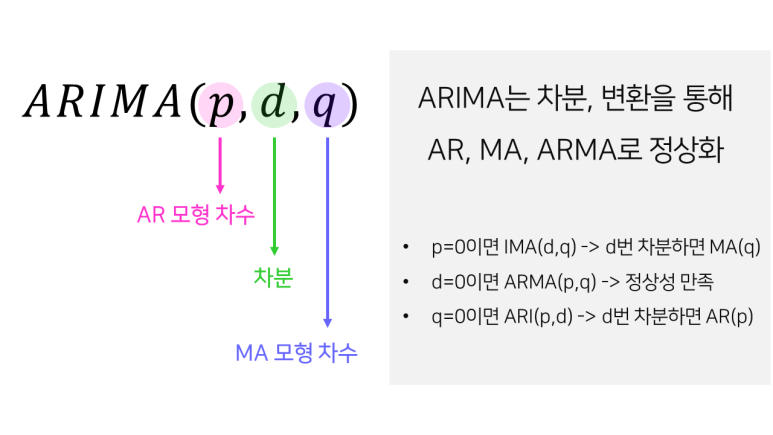
- ARMA(p, q) + 차분 = ARIMA(p,d,q)
- 백색잡음: ARIMA(0,0,0)
- 자기회귀: ARIMA(p,0,0) = AR(p)
- 이동평균: ARIMA(0,0,q) = MA(q)
- 랜덤워크: 상수 없는 ARIMA(0,1,0)
    - $Y_t = Y_{t-1} + \varepsilon_t$
    - 무작위 충격만 더해져 예측 불가
    - 방향성 X
    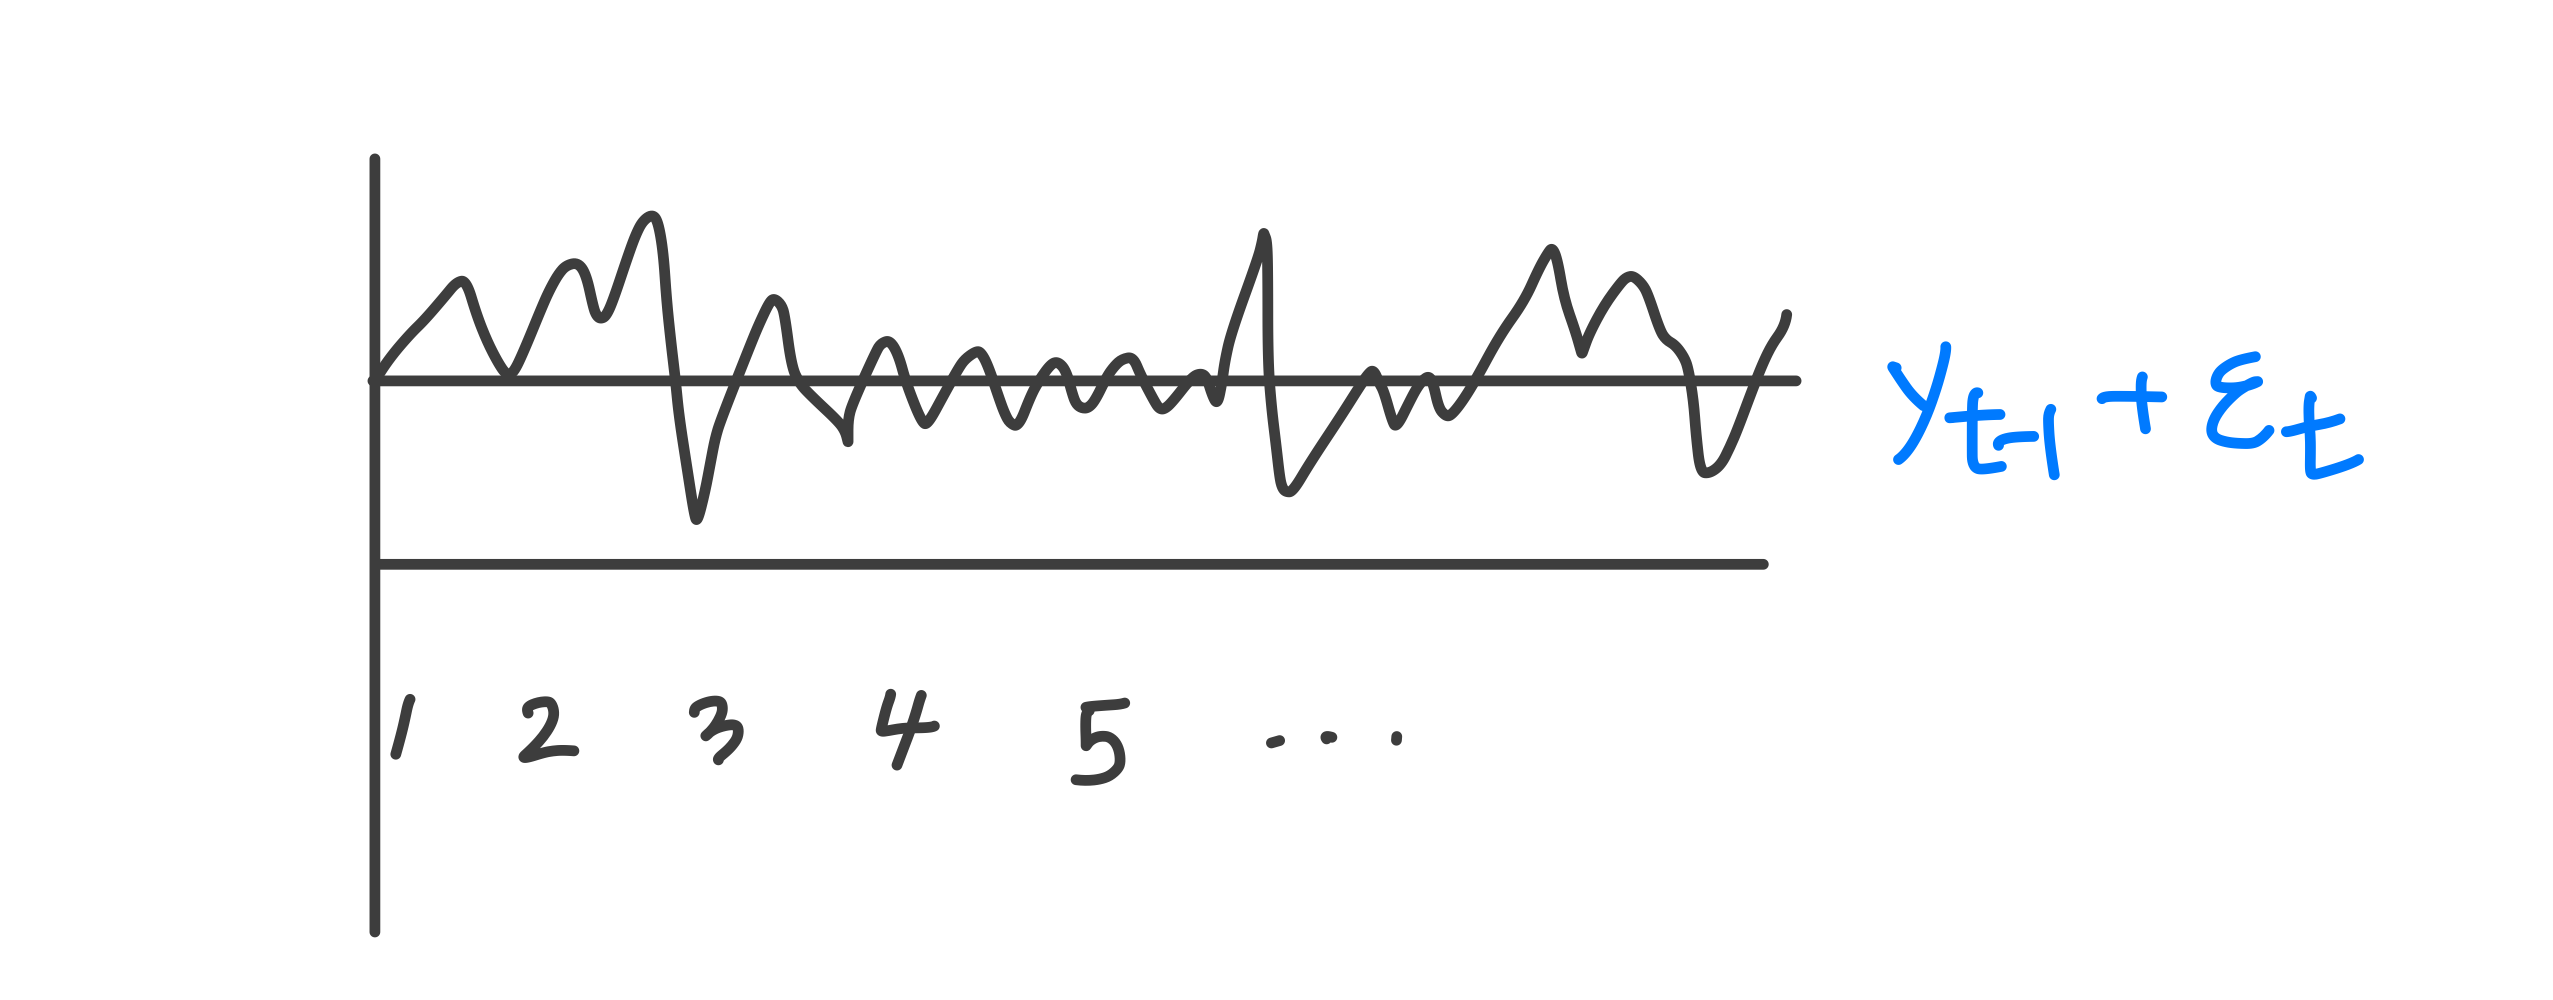
- 표류 랜덤워크: 상수 있는 ARIMA(0,1,0)
    - $Y_t = Y_{t-1} + \varepsilon_t + c$
    - 상수 누적 영향으로 방향성 존재
    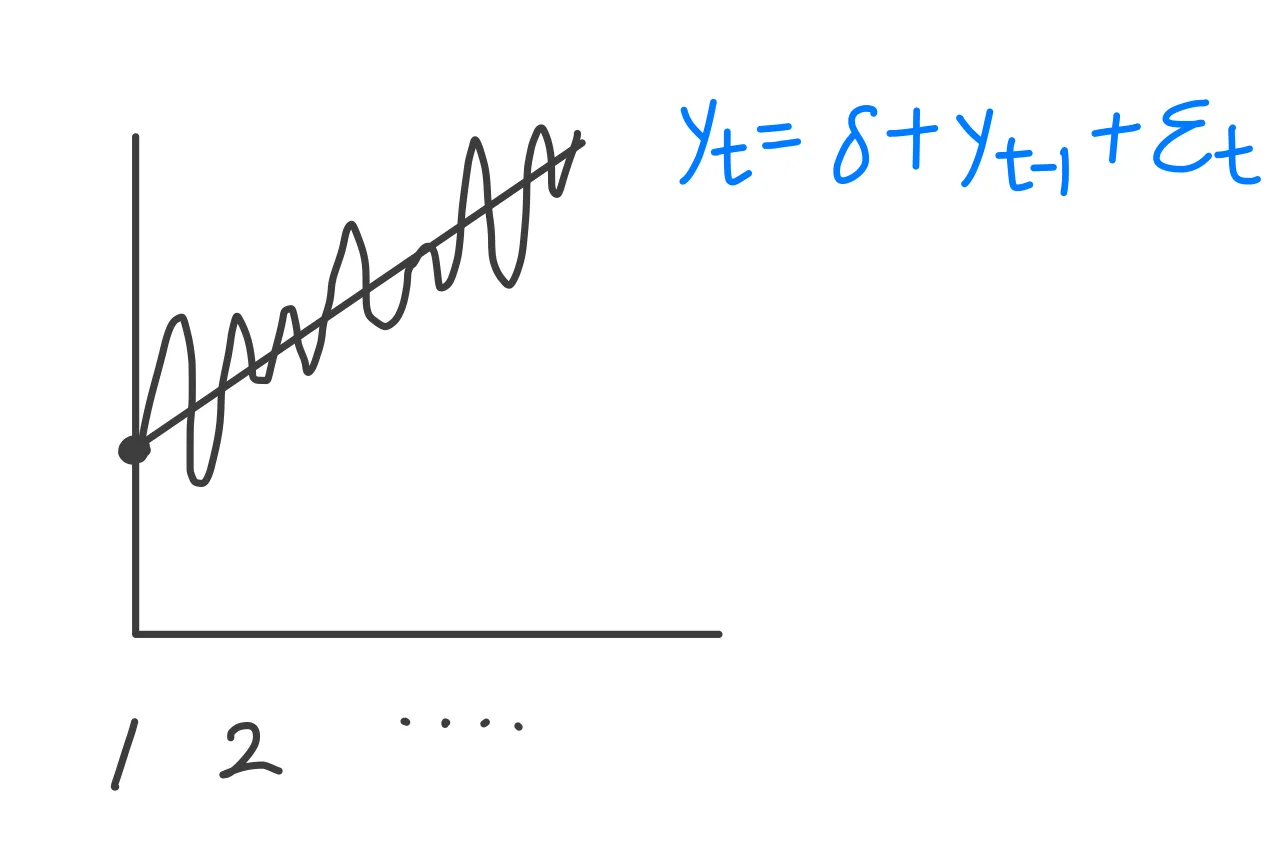

### 2. SARIMA (Seasonal ARIMA)
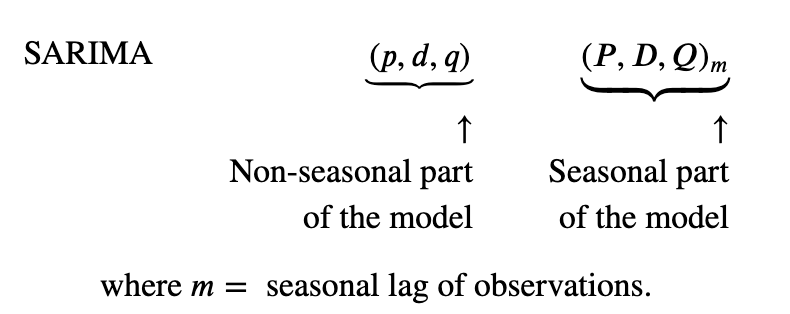
- $ARIMA(p,d,q) + \text{계절성(Seasonal) 차분} \\ \rightarrow SARIMA(p,d,q)(P, D, Q)_m$
- 시계열 데이터의 계절성 처리 가능
- ARIMA + 계절성 변동
- P, D, Q는 계절 ARIMA 파라미터

### 계절성 데이터의 ACF, PACF
- 계절 주기 m이면, ACF에서 m의 배수 lag에서 급등
- 비계절성 추세 파악 어려움
- 계절성 차분 먼저 하고 비계절성 차분 수행해야 함

### 하이퍼파라미터결정 방법
1. d, D(차분, 계절 차분) 결정
    - ADF로 정상성 확보 여부 판단 후 결정
    - 대부분 0, 1에서 결정됨.
2. p, q(AR, MA 차수)
    - ACF, PACF로 범위 추정
    - AIC, BIC(낮을수록 좋다)로 그리드 서치 후 최종 선택
    - 0~3에서 진행

# 2. 다변량 시계열 분석

### 2.1. VAR(Vector Autoregression)
- 자기의 과거, 다른 변수들의 과거를 함께 사용하기
- 양방향으로, 서로 영향을 주고 받는다.
- 여러 경제 지표가 서로 영향을 주고 받을 때, 상호작용, 상호의존성
- 변수가 너무 많거나 명확하지 않으면 부적합함.
- Granger Causality Test(그레인저 인과관계 검정): 예측 가능성

### VAR 모델을 활용한 분석 방법
1. 충격 반응 함수(IRF, Impulse-Response Function)
    - 한 시계열에 충격이 발생할 때, 다른 시계열은 언제 충격 영향을 받을지
2. 예측오차 분산 분해(Variance Decomposition)
    - 어떤 시계열이 어떤 영향을 끼치는지 중요도 산출
    - 미래 예측에 얼마나 기여하는지


- `+` 변수 간 양방향, 여러 변수 함께 예측
- `+` 동시성 문제 X
- `-` 파라미터 폭발 위험, 장기적 관계 정보 손실
- `-` 상관관계 != 인과관계

# 3. 딥러닝을 활용한 시계열 분석

## 3.0. 등장 배경
- 전통 모델 한계
    - 처리 속도
    - 크기 고정 데이터만 가능
    - 비선형 포착 어려움

## 3.1. RNN 계열
1. RNN
    - 짧은~중간 길이 시계열
    - 순차적 의존 강한 데이터(주가)
    - 자기상관 큰 데이터
    - 매우 긴 시계열, 병렬 처리 필요시 부적합하다.
2. LSTM
    - 장기의존성
    - 중요한 과거 사건이 먼 미래에 영향을 주는 경우
3. GRU
    - 장기 의존성 + 학습 속도
    - 데이터가 상대적으로 적을 때
    - 실시간 처리

## 3.2. Transformer 계열
- 매우 긴 시계열
- 전역 패턴, 대규모 데이터
- 다변량 시계열
- 짧은 시계열, 자원 제한 경우엔 부적합하다.

1. Vanilla Transformer
    - 기본 transformer
    - 짧~중 길이
2. Informer
    - ProbSparse Attention(중요 쿼리만 선택)
    - 계산 복잡도 낮음, 긴 시계열 가능
    - 장기 예측에 적합하다.
3. Autoformer
    - Decomposition + Auto-Correlation
    - 주기 패턴이 뚜렷할 때
4. Temporal Fusion Transformer(TFT)
    - 다중 시점 예측
    - 해석 가능
    - 여러 외생 변수 고려 가능

## 3.3. Foundation Model
- 거대 데이터로 사전 학습, 범용 모델
- 특정 문제 전용 X, 범용적이다.
- 사전학습 후 Fine-tuning

### 1. LLM 기반
1. Without Adaptation
    - LLM이 시계열 지식을 가지고 있다고 가정
    - 프롬프트 엔지니어링

2. Adapt LLM
    - 시계열 데이터로 Fine-tuning
    - 일부 or 전체 Fine-tuning
3. Adapt to LLM
    - 시계열을 텍스트로 변환 후 활용

### 2. 자체 거대 모델
- 시계열 전용으로 학습
- 대규모 시계열 데이터 수집이 중요

## 3.4. 딥러닝 모델 선택 가이드
- 단순함 vs 성능
    - RNN < LSTM/GRU < Transformer
- 해석 가능 vs 정확도
    - 통계 모델 > 딥러닝
- 학습 시간 vs 예측 성능
- 데이터 크기
    - 적으면 통계 모델/RNN, 많으면 Transformer

### 참고
- 데이터가 적으면 딥러닝보다 ARIMA 등이 효과적일 수 있음.
- 장기의존성은 LSTM이 GRU보다 굿
- 해석이 중요하면 어텐션으로 해석 가능한 TFT 고려